In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [3]:
batch_size=64

num_classes=10

epochs=10

def build_model(optimizer):

  model=Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

  return model

In [9]:
import pandas as pd
import time
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
histories = {}
training_times = {}
for opt in optimizers:
    model = build_model(opt)

    start_time = time.time()
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    end_time = time.time()

    training_time = end_time - start_time

    histories[opt] = hist.history
    training_times[opt] = training_time


Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 2.2648 - accuracy: 0.1715 - val_loss: 2.1980 - val_accuracy: 0.5035
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 2.1579 - accuracy: 0.3605 - val_loss: 2.0762 - val_accuracy: 0.6567
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 2.0383 - accuracy: 0.4940 - val_loss: 1.9365 - val_accuracy: 0.7162
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 1.9003 - accuracy: 0.5761 - val_loss: 1.7796 - val_accuracy: 0.7504
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 1.7531 - accuracy: 0.6270 - val_loss: 1.6154 - val_accuracy: 0.7727
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6002 - accuracy: 0.6654 - val_loss: 1.4528 - val_accuracy: 0.7907
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 1.4558 - accuracy: 0.6890 - val_loss: 1.2999 - val_accuracy: 0.8032
Epoch 

In [13]:
# Creating a DataFrame to display the results
data = {
    'Optimizer': optimizers,
    'Training Time (seconds)': [training_times[opt] for opt in optimizers],
    'Training Loss': [histories[opt]['loss'][-1] for opt in optimizers],  # Last epoch training loss
    'Validation Loss': [histories[opt]['val_loss'][-1] for opt in optimizers],  # Last epoch validation loss
    'Accuracy': [histories[opt]['accuracy'][-1] for opt in optimizers]  # Last epoch accuracy
}
df = pd.DataFrame(data)

print(df)

  Optimizer  Training Time (seconds)  Training Loss  Validation Loss  Accuracy
0  Adadelta                45.310518       1.108847         0.943058  0.736133
1   Adagrad                44.053698       0.358912         0.250745  0.894117
2      Adam                44.249380       0.026380         0.038096  0.991067
3   RMSprop                83.174181       0.041816         0.036587  0.987533
4       SGD                42.773012       0.181820         0.108677  0.945467


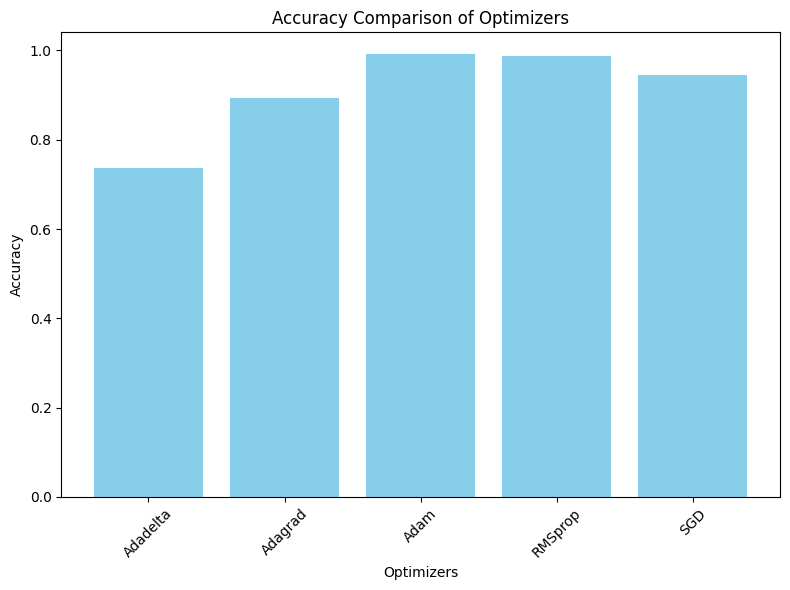

In [22]:
import matplotlib.pyplot as plt
# Visualization - Bar plot for Training Time, Losses, and Accuracy
# Visualization - Accuracy comparison using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(df['Optimizer'], df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison of Optimizers')
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()